# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [20]:
!pwd

/c/Users/spljsc/Documents/DP100/ml-basics/challenges


In [21]:
# !pip install pandas

import pandas as pd
import numpy as np

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **CDepier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSDepTime**: The scheduled Depival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [22]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [23]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

# Data Cleaning

In [24]:
num_vars = df_flights.select_dtypes(exclude="object").columns.tolist()
print(num_vars)
print(f"Number of number vars: {len(num_vars)}")

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginAirportID', 'DestAirportID', 'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'Cancelled']
Number of number vars: 13


In [25]:
object_vars = df_flights.select_dtypes(include="object").columns.tolist()
print(object_vars)
print(f"Number of object vars: {len(object_vars)}")

['Carrier', 'OriginAirportName', 'OriginCity', 'OriginState', 'DestAirportName', 'DestCity', 'DestState']
Number of object vars: 7


In [26]:
df_flights.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15              True
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [27]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [28]:
missing_cols = df_flights.isnull().any().loc[lambda x: x== True].index.tolist()

In [29]:
df_flights[missing_cols].isnull().sum()/len(df_flights[missing_cols])

DepDel15    0.010153
dtype: float64

In [30]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [31]:
# df_nodups = df_flights.drop_duplicates(['DepDelay','DepDel15'])[['DepDelay','DepDel15']]

# # print(df_nodups[df_nodups['DepDel15'].isna()])
# df_flights.query('DepDel15 not in [0,1]').groupby(['DepDelay','DepDel15'], dropna=False).size()

In [32]:
df_flights[df_flights.isnull().any(axis=1)].groupby(['DepDelay','DepDel15'], dropna=False).size()

DepDelay  DepDel15
0         NaN         2761
dtype: int64

In [33]:
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)

In [34]:
df_flights.isna().any(axis=0)

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
Carrier              False
OriginAirportID      False
OriginAirportName    False
OriginCity           False
OriginState          False
DestAirportID        False
DestAirportName      False
DestCity             False
DestState            False
CRSDepTime           False
DepDelay             False
DepDel15             False
CRSArrTime           False
ArrDelay             False
ArrDel15             False
Cancelled            False
dtype: bool

In [35]:
# !pip install matplotlib
import matplotlib
%matplotlib inline

In [36]:
# Create a function that we can re-use
def show_distribution(var_data):
   
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Distribution of {var_data.name}')

    # Show the figure
    fig.show()



Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\spljsc\AppData\Local\Temp\ipykernel_61220\150129242.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\spljsc\AppData\Local\Temp\ipykernel_61220\150129242.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



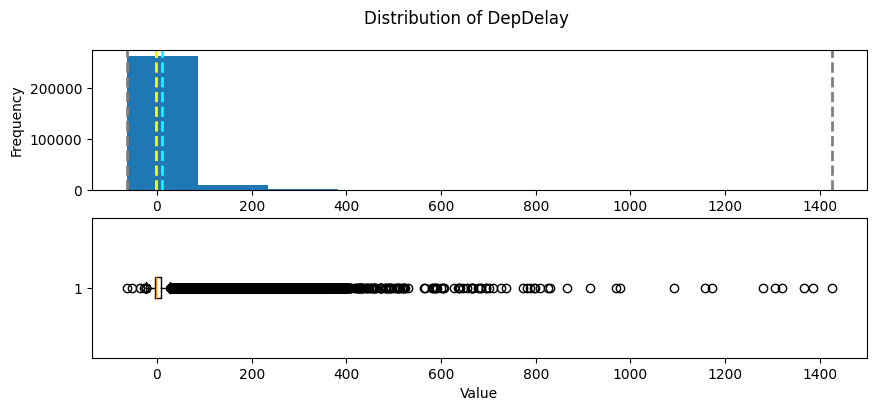

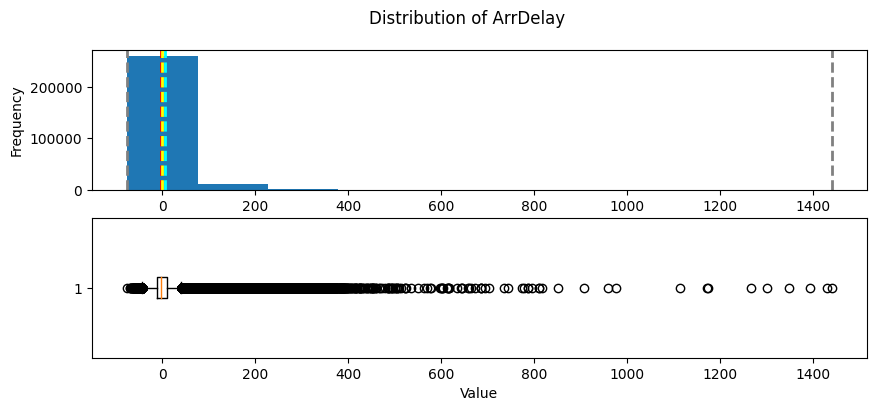

In [37]:
# Call the function
show_distribution(df_flights['DepDelay'])
show_distribution(df_flights['ArrDelay'])

In [38]:
ArrDelay_q1 = df_flights.ArrDelay.quantile(0.01)
ArrDelay_q95 = df_flights.ArrDelay.quantile(0.95) 

DepDelay_q1 = df_flights.DepDelay.quantile(0.01)
DepDelay_q95 = df_flights.DepDelay.quantile(0.95)

In [39]:
print("ArrDelay:")
print(f"Quantile 0.05 is {ArrDelay_q1}")
print(f"Quantile 0.99 is {ArrDelay_q95}\n")

print("DepDelay:")
print(f"Quantile 0.01 is {DepDelay_q1}")
print(f"Quantile 0.95 is {DepDelay_q95}")

ArrDelay:
Quantile 0.05 is -33.0
Quantile 0.99 is 71.0

DepDelay:
Quantile 0.01 is -12.0
Quantile 0.95 is 70.0


In [40]:
df_flights = df_flights[(df_flights['ArrDelay']>ArrDelay_q1) & (df_flights['ArrDelay'] <ArrDelay_q95)]
df_flights = df_flights[(df_flights['DepDelay']>DepDelay_q1) & (df_flights['DepDelay'] <DepDelay_q95)]

Minimum:-32.00
Mean:-0.09
Median:-4.00
Mode:0.00
Maximum:70.00

Minimum:-11.00
Mean:3.92
Median:-1.00
Mode:-3.00
Maximum:69.00



C:\Users\spljsc\AppData\Local\Temp\ipykernel_61220\150129242.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\spljsc\AppData\Local\Temp\ipykernel_61220\150129242.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


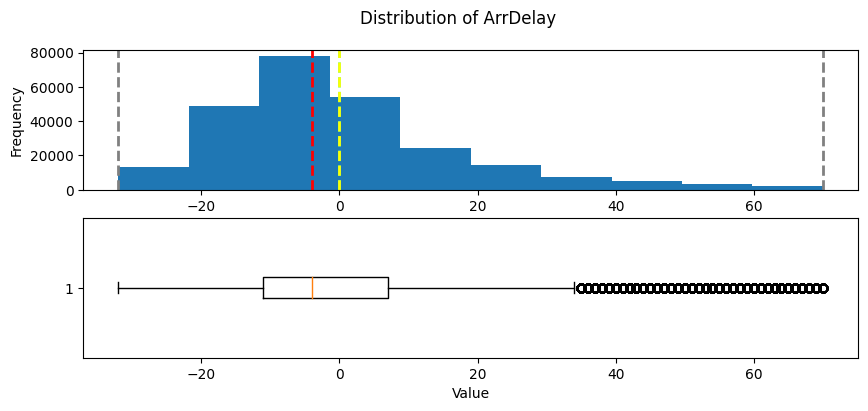

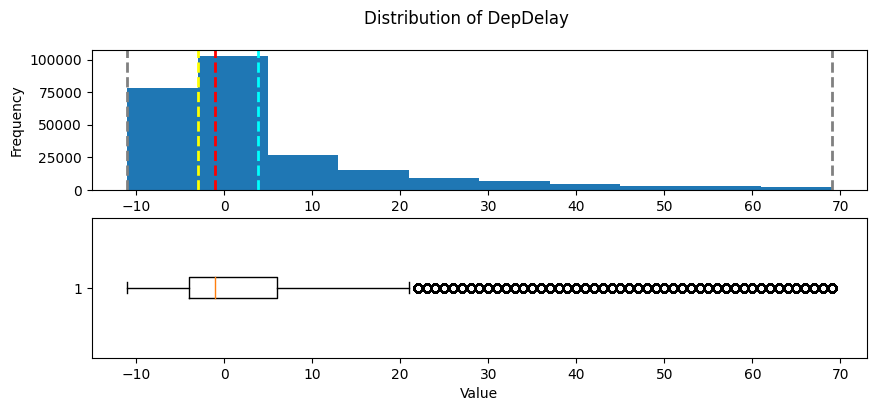

In [41]:
show_distribution(df_flights['ArrDelay'])
show_distribution(df_flights['DepDelay'])

In [42]:
# import plotly.express as px

# fig = px.violin(df_flights, y="DepDelay", points="outliers")
# fig.show()

In [43]:
# import plotly.express as px

# fig = px.box(df_flights, y="DepDelay")
# fig.show()

# Data Exploration

- View summary statistics for the numeric fields in the dataset.

In [44]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,250861.0,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000,250861.000000
mean,2013.0,6.998071,15.819155,3.902380,12747.322453,12736.027569,1311.783203,3.915599,0.154839,1492.507106,-0.086311,0.171808,0.011469
std,0.0,1.991290,8.816356,1.990234,1505.701718,1505.575497,469.974665,14.081157,0.361752,490.551486,17.333704,0.377214,0.106475
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,910.000000,-4.000000,0.000000,1112.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1306.000000,-1.000000,0.000000,1515.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1714.000000,6.000000,0.000000,1909.000000,7.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,69.000000,1.000000,2359.000000,70.000000,1.000000,1.000000


- Determine the distribution of the **DepDelay** and **ArrDelay** columns.

<AxesSubplot: ylabel='Frequency'>

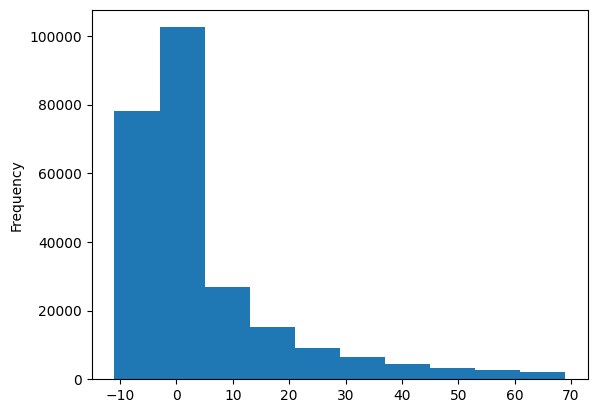

In [47]:
df_flights['DepDelay'].plot.hist()

<AxesSubplot: >

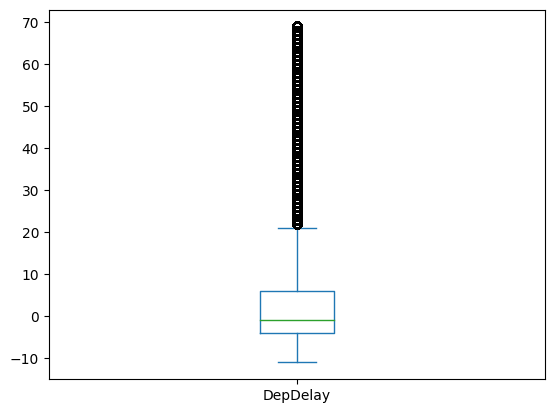

In [49]:
df_flights['DepDelay'].plot.box()

In [ ]:
# Create a function that we can re-use
def show_dist(var_data):
   
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Distribution of {var_data.name}')

    # Show the figure
    fig.show()



In [78]:
def showdist(var_data):

    from matplotlib import pyplot as plt
    # var_data = df_flights['DepDelay']

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    fig, ax = plt.subplots()

    # Plot the histogram   
    ax.boxplot(var_data)

    # Add lines for the mean, median, and mode
    # ax.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax.axhline(y=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.annotate(f'Min: {min_val}', xy=(1.3,min_val+1),  xycoords='data', color='blue')
    plt.annotate(f'Max: {max_val}', xy=(1.3,max_val+1),  xycoords='data', color='blue')
    plt.annotate(f'Mean: {mean_val:.2f}', xy=(1.3,mean_val+1),  xycoords='data', color='blue')
    plt.annotate(f'Med: {med_val:.2f}', xy=(1.3,med_val+1),  xycoords='data', color='blue')
    plt.annotate(f'Mod: {mod_val:.2f}', xy=(1.3,mod_val+1),  xycoords='data', color='blue')

    # Add a title to the Figure
    fig.suptitle(f'Distribution of {var_data.name}')

    plt.show()

Minimum:-11.00
Mean:3.92
Median:-1.00
Mode:-3.00
Maximum:69.00



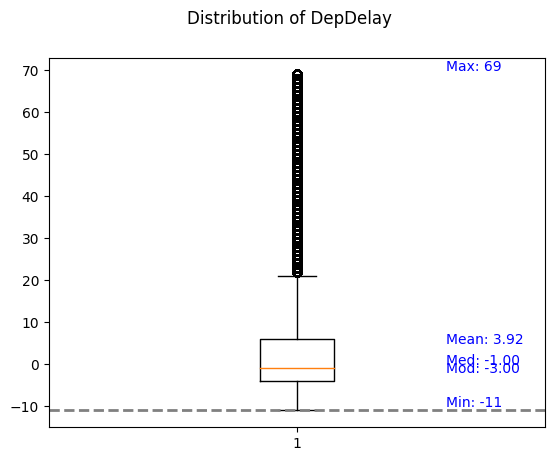

In [79]:
showdist(df_flights['DepDelay'])

Minimum:-32.00
Mean:-0.09
Median:-4.00
Mode:0.00
Maximum:70.00



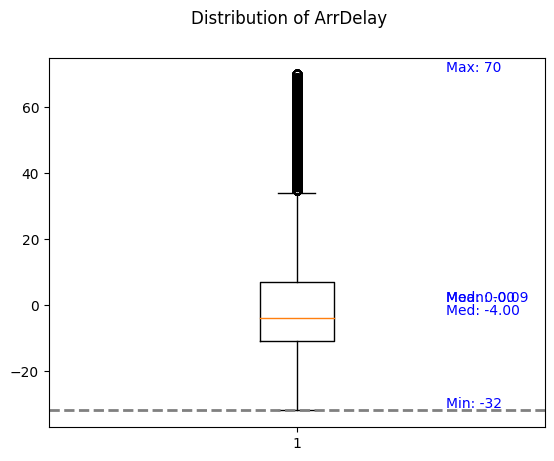

In [80]:
showdist(df_flights['ArrDelay'])

 - *What are the average (mean) departure and arrival delays?*

In [86]:
arrdel_mean = df_flights['ArrDelay'].mean()
depdel_mean = df_flights['DepDelay'].mean()
print(f'Mean arival delay: {arrdel_mean:.2f}')
print(f'Mean departure delay: {depdel_mean:.2f}')

Mean arival delay: -0.09
Mean departure delay: 3.92


 *How do the carriers compare in terms of arrival delay performance?*

In [87]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [92]:
# !pip install seaborn

In [102]:
df = df_flights.groupby('Carrier')['ArrDelay'].median().abs().sort_values()
print(df)
ord = df.index.tolist()
print(ord)

Carrier
F9    1.0
WN    1.0
FL    2.0
MQ    2.0
AS    3.0
HA    3.0
OO    3.0
US    3.0
YV    3.0
AA    4.0
B6    4.0
VX    4.0
EV    5.0
DL    6.0
UA    6.0
9E    7.0
Name: ArrDelay, dtype: float64
['F9', 'WN', 'FL', 'MQ', 'AS', 'HA', 'OO', 'US', 'YV', 'AA', 'B6', 'VX', 'EV', 'DL', 'UA', '9E']


<AxesSubplot: xlabel='Carrier', ylabel='ArrDelay'>

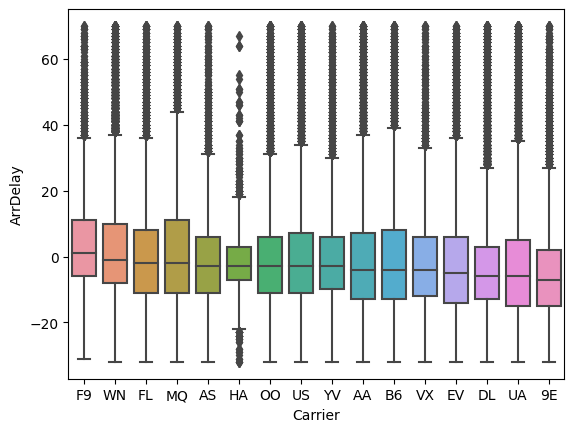

In [103]:
import seaborn as sns
sns.boxplot(x='Carrier',y='ArrDelay',data=df_flights, order=ord)


<AxesSubplot: xlabel='DayOfWeek', ylabel='DepDelay'>

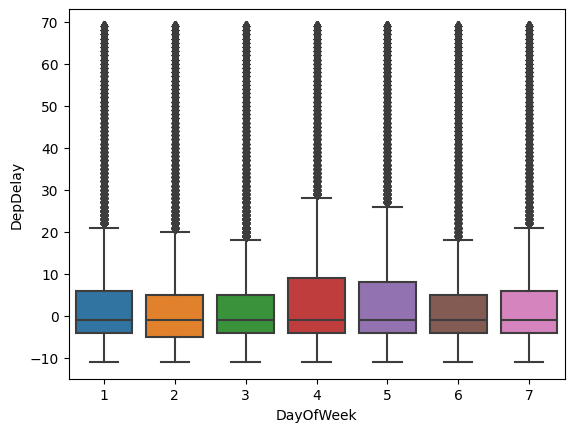

In [105]:
sns.boxplot(x='DayOfWeek',y='DepDelay',data=df_flights)

 - *Which departure airport has the highest average departure delay?*

In [107]:
df_flights.groupby('OriginAirportName')['DepDelay'].mean().abs().sort_values()

OriginAirportName
Tucson International                   0.112871
Honolulu International                 0.292954
Ted Stevens Anchorage International    0.460507
Kahului Airport                        0.474178
Eppley Airfield                        0.719611
                                         ...   
Dallas/Fort Worth International        6.759979
Denver International                   6.910182
Dallas Love Field                      7.670712
William P Hobby                        8.155667
Chicago Midway International           9.961927
Name: DepDelay, Length: 70, dtype: float64

 *Do **late** departures tend to result in longer arrival delays than on-time departures?*

In [108]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [110]:
df_flights.groupby('DepDel15')['ArrDelay'].mean().abs().sort_values()


DepDel15
0.0     4.917526
1.0    26.284067
Name: ArrDelay, dtype: float64

   - *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [113]:
df_flights['Route'] = df_flights['OriginAirportName'] + ">" + df_flights['DestAirportName']

In [114]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International>John F. Kennedy International
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,Pittsburgh International>Chicago Midway Intern...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International>Ronald Reagan Was...
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,Cleveland,OH,804,35,1.0,1027,33,1,0,Chicago O'Hare International>Cleveland-Hopkins...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International>Hartsfield-Jackson Atlan...


In [145]:
df_flights[df_flights['ArrDel15']==1].groupby('Route').size().reset_index().rename(columns={0:'DelayNum'}).sort_values('DelayNum',ascending=False).iloc[0]

Route       Los Angeles International>San Francisco Intern...
DelayNum                                                  203
Name: 1167, dtype: object

In [146]:
df_delays = df_flights[df_flights['ArrDel15']==1].groupby('Route').size().reset_index().rename(columns={0:'DelayNum'}).sort_values('DelayNum',ascending=False)

In [148]:
df_delays.head()

,Route,DelayNum
1167,Los Angeles International>San Francisco Intern...,203
2110,San Francisco International>Los Angeles Intern...,202
995,LaGuardia>Hartsfield-Jackson Atlanta Internati...,134
1146,Los Angeles International>McCarran International,128
1276,McCarran International>Los Angeles International,125


In [149]:
pd.merge(df_flights, df_delays, on='Route', how='left')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Route,DelayNum
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,NY,1539,4,0.0,1824,13,0,0,Tampa International>John F. Kennedy International,29.0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,IL,710,3,0.0,740,22,1,0,Pittsburgh International>Chicago Midway Intern...,20.0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International>Ronald Reagan Was...,6.0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,OH,804,35,1.0,1027,33,1,0,Chicago O'Hare International>Cleveland-Hopkins...,80.0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,GA,545,-1,0.0,728,-9,0,0,Norfolk International>Hartsfield-Jackson Atlan...,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250856,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,...,CA,1730,1,0.0,1945,18,1,0,Orlando International>Los Angeles International,21.0
250857,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,FL,1020,24,1.0,1218,61,1,0,Hartsfield-Jackson Atlanta International>Fort ...,66.0
250858,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,MD,1540,30,1.0,1935,15,1,0,William P Hobby>Baltimore/Washington Internati...,19.0
250859,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,...,HI,609,-5,0.0,641,-6,0,0,Kahului Airport>Honolulu International,68.0


In [153]:
len(df_flights.query('Route == "Los Angeles International>McCarran International" and ArrDel15 != 0'))

128

In [158]:
df_flights.groupby('Route')['ArrDelay'].mean().abs().sort_values(ascending=False).reset_index().iloc[0]

Route       Pittsburgh International>Raleigh-Durham Intern...
ArrDelay                                                 63.0
Name: 0, dtype: object